In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from linUCB_ver3 import LinUCB
import numpy as np
import matplotlib.pyplot as plt

ucb = LinUCB(alpha=0.1, max_items=100, allow_selecting_known_arms=True)

#ucb.remove_random_ratings(20)


Initializing matrix A of shape (321, 30, 30) which will require 2.3112MB of memory.

LinUCB successfully initialized.


In [2]:
ucb.A.shape

(321, 30, 30)

In [3]:
# recommending page to query (30 queries)
avg_reward, auc_scores  = ucb.run(num_epochs=40)

Finished epoch 0/40 with avg reward 0.0033333333333333335, auc score 0.5018043527896302 in 6.164912462234497s
Finished epoch 1/40 with avg reward 0.0, auc score 0.5018054713345598 in 6.132658958435059s
Finished epoch 2/40 with avg reward 0.0033333333333333335, auc score 0.5019242992560697 in 6.140237808227539s
Finished epoch 3/40 with avg reward 0.0, auc score 0.5019374945907866 in 6.1044697761535645s
Finished epoch 4/40 with avg reward 0.02, auc score 0.5194380388328039 in 6.127863883972168s
Finished epoch 5/40 with avg reward 0.04, auc score 0.5213386563954414 in 6.153230667114258s
Finished epoch 6/40 with avg reward 0.05, auc score 0.5308845809839812 in 6.104212522506714s
Finished epoch 7/40 with avg reward 0.06, auc score 0.5346106813490603 in 6.172828197479248s
Finished epoch 8/40 with avg reward 0.06, auc score 0.5348242185670349 in 6.104876279830933s
Finished epoch 9/40 with avg reward 0.07, auc score 0.5421239476414711 in 6.0861122608184814s
Finished epoch 10/40 with avg reward

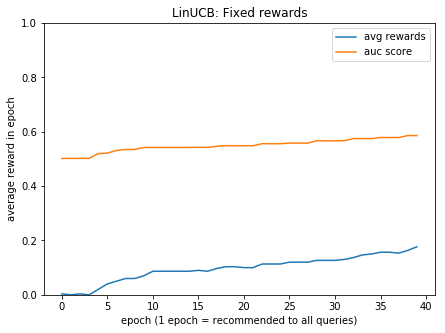

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 5
plt.plot(range(len(avg_reward)), avg_reward, label='avg rewards')
plt.plot(range(len(avg_reward)), auc_scores, label='auc score')
plt.ylabel('average reward in epoch')
plt.ylim(0, 1)
plt.xlabel('epoch (1 epoch = recommended to all queries)')
plt.title('LinUCB: Fixed rewards')
plt.legend()

In [5]:
def make_prediction():
    A = ucb.A
    b = ucb.b          


    query_ids = range(ucb.num_queries)
    page_ids = range(ucb.num_articles)


    allscores=np.zeros((ucb.num_queries,ucb.num_articles))            

    for j in page_ids:
        for i in query_ids:
            # get the arm features given page id, and a query embeddings
            # though here I all queries are insample, I still use this out-of-sample arm function so it 
            # can be applied on held-out query data sets for validation in the future
            arm_features = ucb.get_featuers_of_new_query_oos(i,j)

            x_ta = arm_features.reshape(-1, 1)  # make a column vector

            A_a_inv = np.linalg.inv(A[j])
            theta_a = A_a_inv.dot(b[j])
            score_a = theta_a.T.dot(x_ta)
            allscores[i,j]=score_a  


    p_i = []
    for i in query_ids:
        #p_i.append(np.argmax(allscores[i,:]))
        p_i.append(allscores[i,:].argsort()[::-1][:5])

    return p_i

p_i = make_prediction()

In [12]:
import pickle

acc = 0
ratings=pickle.load(open('data/sample_by_question_questions_article_ratings.pkl','rb'))

for loop in range(len(p_i)):
    print(loop)
    if ratings[loop][0] in p_i[loop]:
        acc+=1
        
print(acc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

IndexError: list index out of range

In [33]:
  

heldout_rating = pickle.load(open('data/heldout_by_question_questions_article_ratings.pkl','rb'))
heldout_intent = pickle.load(open('data/heldout_by_question_query_intents.pkl','rb'))
heldout_features = pickle.load(open('data/heldout_by_question_page_features.pkl','rb'))


In [36]:
heldout_rating

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 5),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 12),
 (9, 13),
 (10, 6),
 (11, 14),
 (12, 15),
 (13, 14),
 (14, 6),
 (15, 16),
 (16, 13),
 (17, 17),
 (18, 13),
 (19, 17),
 (20, 15),
 (21, 18),
 (22, 19),
 (23, 20),
 (24, 21),
 (25, 20),
 (26, 22),
 (27, 0),
 (28, 8),
 (29, 24),
 (30, 25),
 (31, 26),
 (32, 25),
 (33, 25),
 (34, 25),
 (35, 25),
 (36, 27),
 (37, 28),
 (38, 25),
 (39, 0),
 (40, 29),
 (41, 30),
 (42, 25),
 (43, 31),
 (44, 31),
 (45, 32),
 (46, 31),
 (47, 25),
 (48, 30),
 (49, 33),
 (50, 34),
 (51, 26),
 (52, 35),
 (53, 36),
 (54, 26),
 (55, 34),
 (56, 37),
 (57, 34),
 (58, 38),
 (59, 29),
 (60, 26),
 (61, 40),
 (62, 41),
 (63, 42),
 (64, 42),
 (65, 42),
 (66, 42),
 (67, 44),
 (68, 45),
 (69, 46),
 (70, 47),
 (71, 42),
 (72, 42),
 (73, 48),
 (74, 49),
 (75, 48),
 (76, 42),
 (77, 50),
 (78, 51),
 (79, 52),
 (80, 53),
 (81, 54),
 (82, 42),
 (83, 42),
 (84, 42),
 (85, 42),
 (86, 46),
 (87, 42),
 (88, 42),
 (89, 42),
 (90, 60),
 (91, 61),
 (92, 62),


In [42]:
import random 

def make_prediction_oos():
    
    A = ucb.A
    b = ucb.b      
    # load the heldout data
    
    page_pca_features = pickle.load(open('data/infowave_allintents_title.pkl','rb'))
    all_pca_features = np.concatenate([v for k,v in page_pca_features.items()], 0)
    pca = PCA(n_components=5)
    pca.fit_transform(all_pca_features)
    X_pca = pca.transform(all_pca_features)
            
    heldoutsample_label = pickle.load(open('data/heldoutsample_by_question_article_ratings.pkl','rb'))
    heldoutsample_intent = pickle.load(open('data/heldoutsample_by_question_query_intents.pkl','rb'))

    query_ids = range(len(heldoutsample_intent))
    page_ids = range(ucb.num_articles)


    allscores=np.zeros((len(heldoutsample_intent),ucb.num_articles)) 
    

    for j in page_ids:
        for i in query_ids:
            # get the arm features given page id, and a query embeddings
            # though here I all queries are insample, I still use this out-of-sample arm function so it 
            # can be applied on held-out query data sets for validation in the future
            
            
            query_features = heldout_intent[i]
            article_features=X_pca[j,:]
            arm_features = np.concatenate((query_features, article_features), axis=0)
            x_ta = arm_features.reshape(-1, 1)  # make a column vector
            A_a_inv = np.linalg.inv(A[j])
            theta_a = A_a_inv.dot(b[j])
            score_a = theta_a.T.dot(x_ta)
            allscores[i,j]=score_a  

    p_i_test = []
    rating_test=[]
    
    for i in query_ids:
        #p_i.append(np.argmax(allscores[i,:]))
        p_i_test.append(allscores[i,:].argsort()[::-1][:5])
        rating_test.append(heldoutsample_label[i,:].argsort()[::-1])
        
    return p_i_test, rating_test

p_i_test, rating_test = make_prediction_oos()

In [46]:
acc = 0
for loop in range(len(p_i_test)):
    if rating_test[loop][0] in p_i_test[loop]:
        acc+=1
        
print(acc)
    

20


In [29]:
ratings = pickle.load(open('./data/sample_by_question_questions_article_ratings.pkl','rb'))
ratings

[(0, 2),
 (1, 3),
 (2, 5),
 (3, 8),
 (4, 11),
 (5, 13),
 (6, 6),
 (7, 13),
 (8, 13),
 (9, 17),
 (10, 14),
 (11, 19),
 (12, 23),
 (13, 8),
 (14, 25),
 (15, 25),
 (16, 25),
 (17, 25),
 (18, 29),
 (19, 31),
 (20, 34),
 (21, 37),
 (22, 34),
 (23, 38),
 (24, 39),
 (25, 42),
 (26, 44),
 (27, 45),
 (28, 47),
 (29, 48),
 (30, 48),
 (31, 52),
 (32, 53),
 (33, 53),
 (34, 54),
 (35, 42),
 (36, 58),
 (37, 60),
 (38, 63),
 (39, 65),
 (40, 62),
 (41, 21),
 (42, 67),
 (43, 13),
 (44, 69),
 (45, 70),
 (46, 68),
 (47, 21),
 (48, 71),
 (49, 62),
 (50, 16),
 (51, 72),
 (52, 73),
 (53, 62),
 (54, 19),
 (55, 21),
 (56, 78),
 (57, 79),
 (58, 81),
 (59, 76),
 (60, 85),
 (61, 2),
 (62, 85),
 (63, 88),
 (64, 79),
 (65, 91),
 (66, 92),
 (67, 93),
 (68, 94),
 (69, 96),
 (70, 97),
 (71, 98),
 (72, 97),
 (73, 100),
 (74, 99),
 (75, 104),
 (76, 94),
 (77, 97),
 (78, 110),
 (79, 113),
 (80, 114),
 (81, 116),
 (82, 116),
 (83, 117),
 (84, 117),
 (85, 120),
 (86, 110),
 (87, 116),
 (88, 117),
 (89, 117),
 (90, 124),
 

In [12]:
ucb.dataset.get_uknown_items_of_user(1)

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98])

In [13]:
ucb.A

array([[[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  2.,  0., ..., -1.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0., -1.,  0., ...,  2.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

       ...,

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.

In [4]:
dataarray

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  1.,  0.,  0.],
       [ 2.,  1.,  1., ...,  1.,  0.,  0.],
       ...,
       [97.,  1.,  1., ...,  1.,  0.,  0.],
       [98.,  0.,  1., ...,  0.,  0.,  0.],
       [99.,  1.,  1., ...,  1.,  0.,  0.]])

In [3]:
import pickle
from sklearn.decomposition import PCA

url_features = pickle.load(open('data/infowave_allintents_title.pkl','rb'))
all_features = np.concatenate([v for k,v in url_features.items()], 0)
pca = PCA(n_components=5)
pca.fit_transform(all_features)
X_pca = pca.transform(all_features)


In [13]:
X_pca[1].transpose().shape

(5,)

In [14]:
np.concatenate([v for k,v in url_features.items()], 0).shape


(25, 768)

In [8]:
url_features.values().shape

AttributeError: 'dict_values' object has no attribute 'shape'

In [4]:
import pickle


In [11]:
a = question_features['3 Rollovers, 1 was Roth but went into a pretax account. How to fix?']
a.shape

(1, 768)

In [4]:
dict_q_mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 57: 56,
 62: 57,
 65: 58,
 68: 59,
 71: 60,
 72: 61,
 78: 62,
 79: 63,
 126: 64,
 129: 65,
 132: 66,
 135: 67,
 137: 68,
 142: 69,
 143: 70,
 145: 71,
 150: 72,
 152: 73,
 153: 74,
 159: 75,
 160: 76,
 162: 77,
 190: 78,
 192: 79,
 197: 80,
 328: 81,
 408: 82,
 409: 83,
 410: 84,
 412: 85,
 413: 86,
 414: 87,
 417: 88,
 418: 89,
 420: 90,
 422: 91,
 423: 92,
 426: 93,
 427: 94,
 428: 95,
 435: 96,
 437: 97,
 440: 98,
 441: 99,
 443: 100,
 541: 101,
 549: 102,
 551: 103,
 552: 104,
 553: 105,
 554: 106,
 560: 1

In [17]:
import pickle

a = pickle.load(open("data/sample_by_question_query_intents.pkl","rb"))

In [18]:
a

{0: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 1: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 3: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 4: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 5: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 6: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 7: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 8: array([1., 0., 0., 0., 0., 0